In [7]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    get_scheduler
)
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
# IHQID_1mg_train_path = "indic-health-demo/Dataset/IHQID-1mg/train.csv"
# IHQID_1mg_test_path = "indic-health-demo/Dataset/IHQID-1mg/test.csv"

IHQID_WebMD_train_path = "indic-health-demo/Dataset/IHQID-WebMD/train.csv"
IHQID_WebMD_test_path = "indic-health-demo/Dataset/IHQID-WebMD/test.csv"

IHQID_train = pd.read_csv(IHQID_WebMD_train_path)[['question_english', 'Manual_Intent']]
IHQID_test = pd.read_csv(IHQID_WebMD_test_path)[['question_english', 'Manual_Intent']]

IHQID_train['Manual_Intent_Encoded'] = IHQID_train['Manual_Intent']
IHQID_test['Manual_Intent_Encoded'] = IHQID_test['Manual_Intent']

label_encoder = LabelEncoder()
label_encoder.fit(IHQID_train['Manual_Intent_Encoded'])

IHQID_train['Manual_Intent_Encoded'] = label_encoder.transform(IHQID_train['Manual_Intent_Encoded'])
IHQID_test['Manual_Intent_Encoded'] = label_encoder.transform(IHQID_test['Manual_Intent_Encoded'])


In [9]:
tf_idf_vectorizer = TfidfVectorizer(stop_words= 'english', min_df=5, max_df=10000)

encoded_input_train = tf_idf_vectorizer.fit_transform(IHQID_train['question_english'])
encoded_input_test = tf_idf_vectorizer.transform(IHQID_test['question_english'])

In [10]:
classification = svm.SVC(kernel='linear')
classification.fit(encoded_input_train, IHQID_train['Manual_Intent_Encoded'])
y_prediction = classification.predict(encoded_input_test)

In [11]:
print(classification_report(IHQID_test['Manual_Intent_Encoded'], y_prediction))

              precision    recall  f1-score   support

           0       0.51      0.70      0.59        76
           1       0.47      0.45      0.46        53
           2       0.56      0.52      0.54        73
           3       0.79      0.38      0.52        39

    accuracy                           0.54       241
   macro avg       0.58      0.51      0.53       241
weighted avg       0.56      0.54      0.54       241



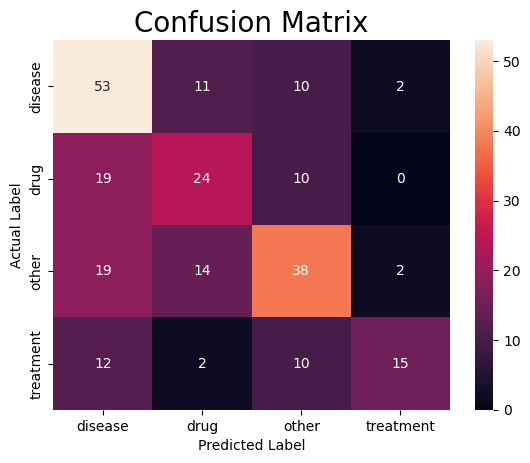

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(IHQID_test['Manual_Intent_Encoded'], y_prediction)

# Plot the confusion matrix.
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=['disease', 'drug', 'other', 'treatment'],
    yticklabels=['disease', 'drug', 'other', 'treatment']
)
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('Actual Label', fontsize=10)
plt.title('Confusion Matrix', fontsize=20)
plt.show()